# R and other Open Source Tools for Data Analysis

## The basics of R

R follows a simple logic and syntax.

You can use R as a calculator:

In [3]:
1 + 1

[1] 2

In [4]:
2 - 2

[1] 0

In [5]:
2 * 3

[1] 6

In [6]:
10 / 5

[1] 2

In [7]:
10 ^ 6

[1] 1e+06

You can store variables to recall later using `<-` (you might be used to using `=` in other languages)



In [10]:
num1 <- 42

In [11]:
num1

[1] 42

In [12]:
num1 * 2

[1] 84

You can use specific **functions** to do things to your variables (perform complex tasks):

In [13]:
round(5.5)

[1] 6

## Using packages

Why is R (or Python, or other languages) so powerful? Because you can use other people's code *really easily*.

This comes in two steps:
1. Download and install their packages (once)
1. Import/attach the package into your code (every time)

Let's import the package "ggplot2"

In [12]:
# Step 1 - Download and install
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
# Step 2 - Import/attach the package to my current code
library(ggplot2)

Now, I can use functions that live inside the ggplot2 package. For example,

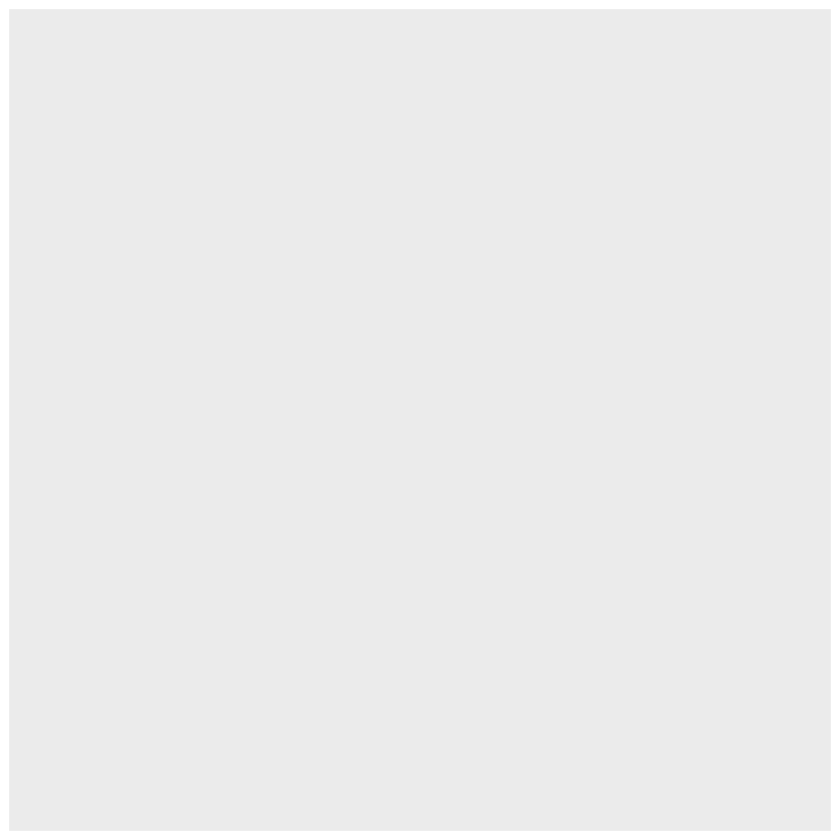

In [17]:
ggplot()

The function `ggplot()` makes a plot. We have not given it any information - no data, no axes, no labels - so it just makes a blank canvas.

Let's get some data so we can make a visualisation.

## Importing Data

Let's bring in some data. The dataset [gapminder](https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv) will do. Use the URL

> https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv

to download and import the data into R.

In [3]:
# Import the data and store it in the variable "gapminder"
gapminder <- read.csv("https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv")

Look at the first and last few entries in it with `head()` and `tail()`:

In [4]:
head(gapminder)

,country,year,pop,continent,lifeExp,gdpPercap
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1,Afghanistan,1952,8425333,Asia,28.801,779.4453
2,Afghanistan,1957,9240934,Asia,30.332,820.8530
3,Afghanistan,1962,10267083,Asia,31.997,853.1007
4,Afghanistan,1967,11537966,Asia,34.020,836.1971
5,Afghanistan,1972,13079460,Asia,36.088,739.9811
6,Afghanistan,1977,14880372,Asia,38.438,786.1134


In [5]:
tail(gapminder)

,country,year,pop,continent,lifeExp,gdpPercap
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1699,Zimbabwe,1982,7636524,Africa,60.363,788.8550
1700,Zimbabwe,1987,9216418,Africa,62.351,706.1573
1701,Zimbabwe,1992,10704340,Africa,60.377,693.4208
1702,Zimbabwe,1997,11404948,Africa,46.809,792.4500
1703,Zimbabwe,2002,11926563,Africa,39.989,672.0386
1704,Zimbabwe,2007,12311143,Africa,43.487,469.7093


We can also get a statistical summary of the data with `summary()`:

In [8]:
summary(gapminder)

   country               year           pop             continent        
 Length:1704        Min.   :1952   Min.   :6.001e+04   Length:1704       
 Class :character   1st Qu.:1966   1st Qu.:2.794e+06   Class :character  
 Mode  :character   Median :1980   Median :7.024e+06   Mode  :character  
                    Mean   :1980   Mean   :2.960e+07                     
                    3rd Qu.:1993   3rd Qu.:1.959e+07                     
                    Max.   :2007   Max.   :1.319e+09                     
    lifeExp        gdpPercap       
 Min.   :23.60   Min.   :   241.2  
 1st Qu.:48.20   1st Qu.:  1202.1  
 Median :60.71   Median :  3531.8  
 Mean   :59.47   Mean   :  7215.3  
 3rd Qu.:70.85   3rd Qu.:  9325.5  
 Max.   :82.60   Max.   :113523.1  

## Processing the data

We can use a handy package for data processing called `dplyr` (data plyer)

In [9]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




This can help us subset, filter, select etc. to transform and prepare our data for analysis and visualisation.

For example, we can filter out all the "Australia" rows and save them:

In [10]:
australia <- filter(gapminder, country == "Australia")
australia

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
Australia,1952,8691212,Oceania,69.120,10039.60
Australia,1957,9712569,Oceania,70.330,10949.65
Australia,1962,10794968,Oceania,70.930,12217.23
Australia,1967,11872264,Oceania,71.100,14526.12
Australia,1972,13177000,Oceania,71.930,16788.63
Australia,1977,14074100,Oceania,73.490,18334.20
Australia,1982,15184200,Oceania,74.740,19477.01
Australia,1987,16257249,Oceania,76.320,21888.89
Australia,1992,17481977,Oceania,77.560,23424.77


## Visualising data

Let's say you want to plot how the population has grown in Australia over time. Now that we've filtered by Australia, we can visualise this!

We need to use the package `ggplot2` from before. Making visualisations is complex, but with ggplot there are three main steps, making use of `ggplot()`:
1. Specify the data with `data = ... `
1. Specify the axes with `mapping = aes(x = ... , y = ... )`
1. Specify the type of graph / objects with ` + geom_line()`, or ` + geom_bar()`, etc.

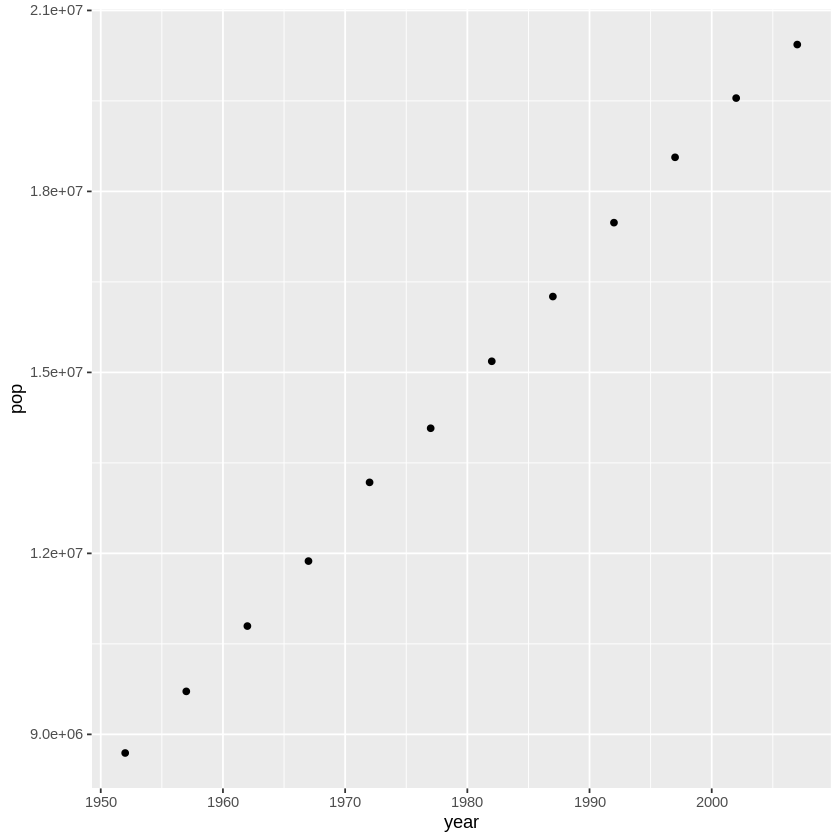

In [15]:
# Plot the
ggplot(data = australia,
       mapping = aes(x = year, y = pop)) +
  geom_point()

Things can get more interesting. If we go back to our original dataset and filter for a specific year, we could use colour to our advantage:

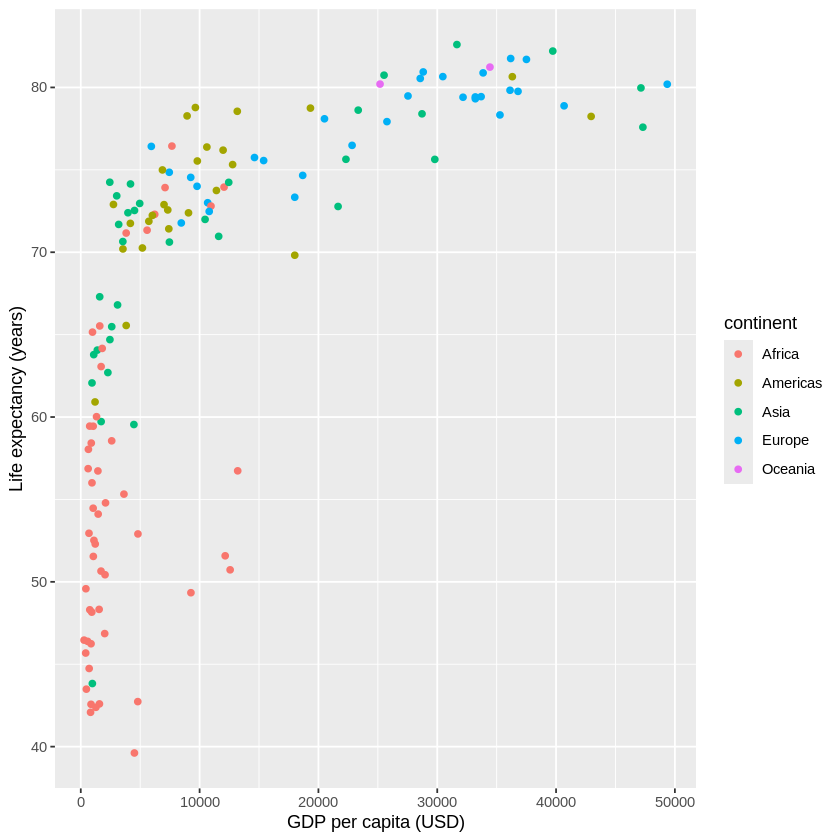

In [22]:
gapminder07 <- filter(gapminder, year == 2007)

ggplot(data = gapminder07,
       mapping = aes(x = gdpPercap,
                     y = lifeExp,
                     colour = continent)) +
  geom_point() +
  xlab("GDP per capita (USD)") +
  ylab("Life expectancy (years)")

## Interactive visualisations

What about plots that the user can interact with? The package `plotly` can help us out.

In [23]:
install.packages("plotly")
library(plotly)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘Rcpp’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




Let's store our plot in a variable:

In [24]:
plot_for_2007 <- ggplot(data = gapminder07,
                        mapping = aes(x = gdpPercap,
                                      y = lifeExp,
                                      colour = continent)) +
  geom_point() +
  xlab("GDP per capita (USD)") +
  ylab("Life expectancy (years)")

Now we can use the function `ggplotly(plot_for_2007)` which **comes from plotly** to turn it into an interactive plot. However, this will only display in RStudio (doesn't work here).

We can get around this by exporting the plot as an HTML file. `htmlwidgets::saveWidget` accesses the `saveWidget` function from the `htmlWidgets` package.

In [27]:
htmlwidgets::saveWidget(ggplotly(plot_for_2007), "index.html")

In your **Google Drive** you should have a file called "index.html". Download and run this, and you should see an interactive plot!